In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
train_data = pd.read_excel(r'./data/Data_Train.xlsx')

In [110]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [112]:
train_data.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [116]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [118]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [120]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [124]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [126]:
train_data.dropna(inplace=True)

In [128]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [130]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [134]:
data = train_data.copy()

In [136]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [140]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [144]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [146]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [148]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [150]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_datetime(feature)

In [152]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [155]:
data["Journey_day"] = data["Date_of_Journey"].dt.day

In [157]:
data["Journey_month"] = data["Date_of_Journey"].dt.month

In [159]:
data["Journey_year"] = data["Date_of_Journey"].dt.year

In [161]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-06 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-06 05:50:00,2025-03-06 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-03-06 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-03-06 18:05:00,2025-03-06 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-03-06 16:50:00,2025-03-06 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [165]:
def extract_hour_min(df, col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(5)

In [167]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [169]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-06 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-06 05:50:00,2025-03-06 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-03-06 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-03-06 18:05:00,2025-03-06 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-03-06 16:50:00,2025-03-06 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [171]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-06 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-06 05:50:00,2025-03-06 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-03-06 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-03-06 18:05:00,2025-03-06 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-03-06 16:50:00,2025-03-06 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [175]:
col_to_drop = ["Dep_Time", "Arrival_Time"]

In [177]:
data.drop(col_to_drop, axis=1, inplace=True)

In [179]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [181]:
data.shape

(10682, 16)

In [185]:
def flight_dep_time(x):
    
    if (x>4)and (x<=8):
        return "Early Morning"

    elif (x>8)and (x<=12):
        return "Morning"

    elif (x>12)and (x<=16):
        return "Noon"

    elif (x>16)and (x<=20):
        return "Evening"

    elif (x>20)and (x<=24):
        return "Night"

    else:
        return "Late Night"

In [187]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

<Axes: xlabel='Dep_Time_hour'>

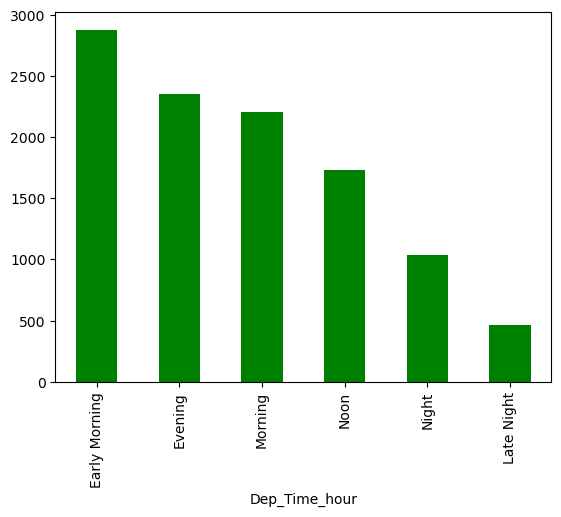

In [189]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color="g")

In [192]:
!pip install plotly
!pip install chart_studio

In [193]:
!pip install cufflinks

In [194]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [195]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [199]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [204]:
def preprocess_duration(x):

    if 'h' not in x:
        x = '0h' + ' ' + x

    elif 'm' not in x:
        x = x + ' ' + '0m'

    return x

In [208]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [210]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25


In [213]:
data['Duration'][0]

'2h 50m'

In [215]:
data['Duration'][0].split(' ')

['2h', '50m']

In [217]:
data['Duration'][0].split(' ')[0]

'2h'

In [219]:
data['Duration'][0].split(' ')[0][0:-1]

'2'

In [221]:
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [223]:
data['Duration_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [225]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


In [229]:
data['Duration_total_mins'] = data['Duration'].str.replace('h', '*60').str.replace(' ', "+").str.replace('m', "*1").apply(eval)

In [231]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140


In [234]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

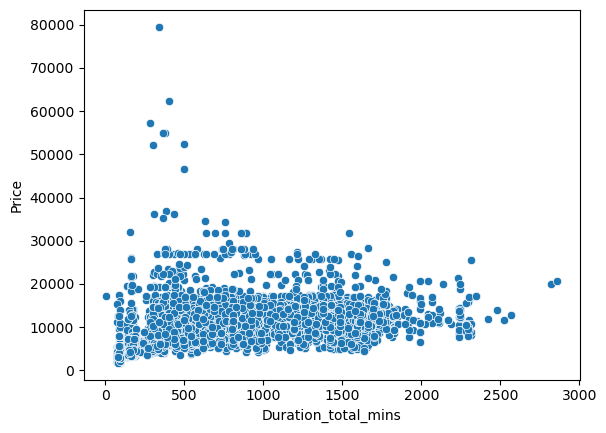

In [236]:
sns.scatterplot(x="Duration_total_mins", y="Price", data=data)

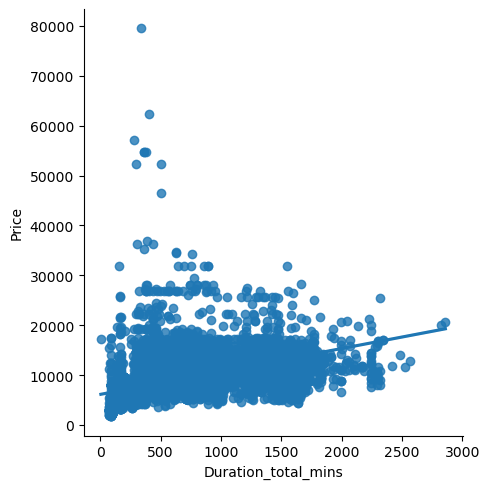

In [237]:
sns.lmplot(x="Duration_total_mins", y="Price", data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

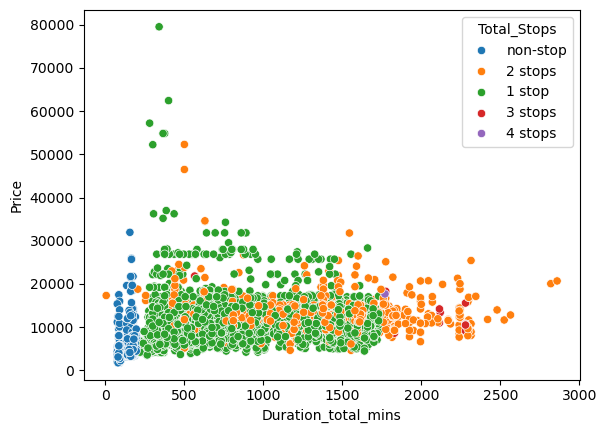

In [239]:
sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops", data=data)

In [243]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

In [245]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

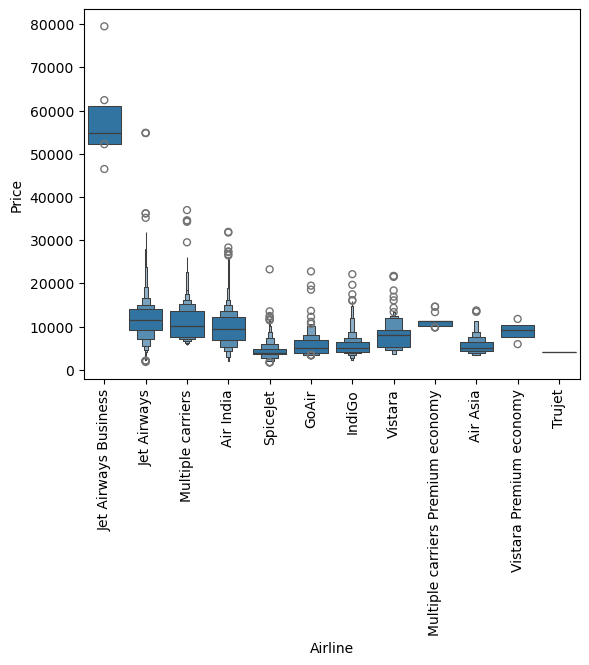

In [248]:
sns.boxenplot(x="Airline", y="Price", data=data.sort_values("Price", ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [251]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

In [253]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [255]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [257]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [260]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [262]:
data['Source'].apply(lambda x: 1 if x=="Banglore" else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [264]:
for sub_category in data["Source"].unique():
    data['Source_' + sub_category] =  data['Source'].apply(lambda x: 1 if x==sub_category else 0)

In [266]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [269]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [272]:
airlines =  data.groupby(['Airline'])['Price'].mean().sort_values().index

In [274]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [277]:
dict_airlines =  {key:index for index, key in enumerate(airlines, 0)}

In [279]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [282]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [285]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [288]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [290]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [293]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [295]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [298]:
dict_dest = {key:index for index, key in enumerate(dest, 0)}

In [300]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [302]:
data['Destination'] = data['Destination'].map(dict_dest)

In [305]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [308]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [311]:
dict_stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [314]:
dict_stops

{'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [318]:
data['Total_Stops'] = data['Total_Stops'].map(dict_stops)

In [320]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [324]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [328]:
data.drop(columns=['Date_of_Journey', 'Route', 'Additional_Info', 'Duration', 'Source', 'Duration_total_mins', 'Journey_year'], index=1, inplace=True)

In [330]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0


In [332]:
data.shape

(10681, 17)

In [335]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)

    sns.distplot(df[col], ax=ax1)
    sns.boxplot(x=df[col], ax=ax2)
    sns.histplot(df[col], ax=ax3, kde=False)

    plt.tight_layout()

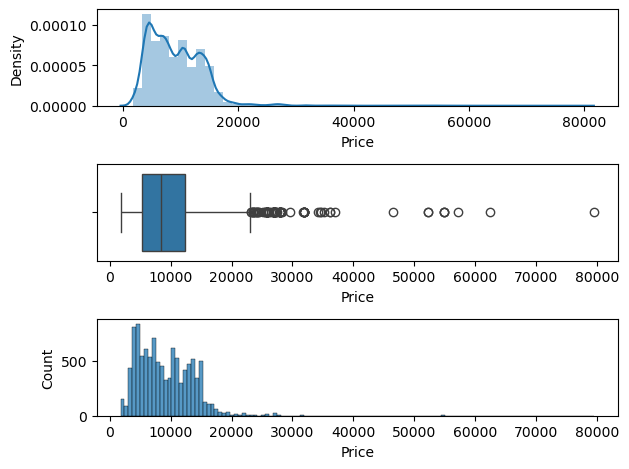

In [337]:
plot(data, 'Price')

In [340]:
q1 = data['Price'].quantile(0.25)

In [342]:
q1

5277.0

In [344]:
q3 = data['Price'].quantile(0.75)

In [346]:
q3

12373.0

In [348]:
iqr = q3 - q1

In [351]:
maximum = q3 + 1.5*iqr

In [353]:
maximum

23017.0

In [355]:
minimum = q1 - 1.5*iqr

In [357]:
minimum

-5367.0

In [359]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [361]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

In [364]:
np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

array([ 3897., 13882.,  6218., ...,  7229., 12648., 11753.])

In [366]:
data['Price'] = np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

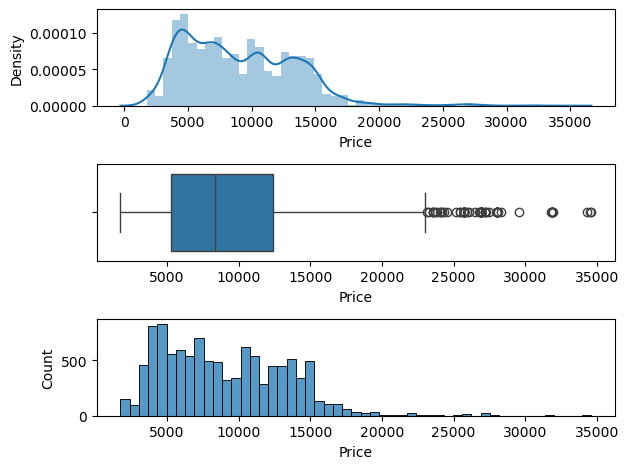

In [368]:
plot(data, 'Price')

In [371]:
# FEATURE SELECTION

In [373]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0


In [375]:
y = data['Price'] 

In [377]:
X = data.drop(columns=["Price"], axis=1)

In [379]:
X

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
2,10,4,2,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,1,3,16,50,21,35,4,45,1,0,0,0,0
5,1,3,0,24,6,9,0,11,25,2,25,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,0,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,0,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,0,1,3,11,30,14,10,2,40,1,0,0,0,0


In [382]:
import sklearn
print(sklearn.__version__)

1.5.1


In [384]:
from sklearn.feature_selection import mutual_info_regression

In [387]:
imp = mutual_info_regression(X, y)

In [388]:
imp

array([1.31699065, 1.06358363, 0.79045297, 0.37651487, 0.6208226 ,
       0.92431009, 0.75659892, 1.14052322, 0.89961163, 1.12594867,
       0.68795408, 0.39148583, 0.45626351, 0.52980822, 0.13419676,
       0.19975832])

In [389]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [393]:
imp_df

,0
Airline,1.316991
Destination,1.063584
Total_Stops,0.790453
Journey_day,0.376515
Journey_month,0.620823
Dep_Time_hour,0.924310
Dep_Time_minute,0.756599
Arrival_Time_hour,1.140523
Arrival_Time_minute,0.899612
Duration_hours,1.125949


In [395]:
imp_df.columns=["importrance"]

In [397]:
imp_df

,importrance
Airline,1.316991
Destination,1.063584
Total_Stops,0.790453
Journey_day,0.376515
Journey_month,0.620823
Dep_Time_hour,0.924310
Dep_Time_minute,0.756599
Arrival_Time_hour,1.140523
Arrival_Time_minute,0.899612
Duration_hours,1.125949


In [399]:
imp_df.sort_values(by=["importrance"], ascending=False)

,importrance
Airline,1.316991
Arrival_Time_hour,1.140523
Duration_hours,1.125949
Destination,1.063584
Dep_Time_hour,0.924310
Arrival_Time_minute,0.899612
Total_Stops,0.790453
Dep_Time_minute,0.756599
Duration_mins,0.687954
Journey_month,0.620823


In [402]:
#BUILDING ML MODEL

In [404]:
#STEP 1: Splitting Data into Training and Test Data

In [406]:
from sklearn.model_selection import train_test_split

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [411]:
#STEP 2: Training Model

In [413]:
from sklearn.ensemble import RandomForestRegressor

In [415]:
ml_model = RandomForestRegressor()

In [417]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [419]:
#STEP 3: Test the Model & Evaluate Accuracy of the Model

In [420]:
y_pred = ml_model.predict(X_test)

In [421]:
y_pred

array([10236.2       ,  6414.38166667,  3616.27      , ...,
       12128.40583333,  6615.964     ,  8788.05      ])

In [427]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.816711641443505

In [430]:
#SAVING MODEL

In [443]:
import pickle

In [445]:
#Saving model in a file

In [447]:
with open('./ml_model.pkl', 'wb') as file:
      pickle.dump(ml_model, file)

In [439]:
#Loading model from the file

In [450]:
with open('./ml_model.pkl', 'rb') as file:
      loaded_model = pickle.load(file)

In [452]:
y_pred2 = loaded_model.predict(X_test)

In [454]:
metrics.r2_score(y_test, y_pred2)

0.816711641443505

In [457]:
#Defining Mean Absolute Percentage Error (MAPE) Function

In [459]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [462]:
mape(y_test, y_pred)

12.970125937390634

In [465]:
#Defining a single function to train different models

In [467]:
from sklearn import metrics 

In [469]:
def prediction(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Model score: {}'.format(model.score(X_train, y_train)))
    y_pred = model.predict(X_test)
    print('prediction of model is: {}'.format(y_pred))
    print('\n')
    print('R2 score of model is: {}'.format(metrics.r2_score(y_test, y_pred)))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('MAPE: {}'.format(mape(y_test, y_pred)))
    sns.distplot(y_test - y_pred)

Model score: 0.9525776615006758
prediction of model is: [10222.01        6472.06        3633.75       ... 12261.16983333
  6494.93        8819.        ]


R2 score of model is: 0.8159966259324961
MAE: 1148.3468141269896
MSE: 3524096.280971871
RMSE: 1877.257649064686
MAPE: 13.0040816443426


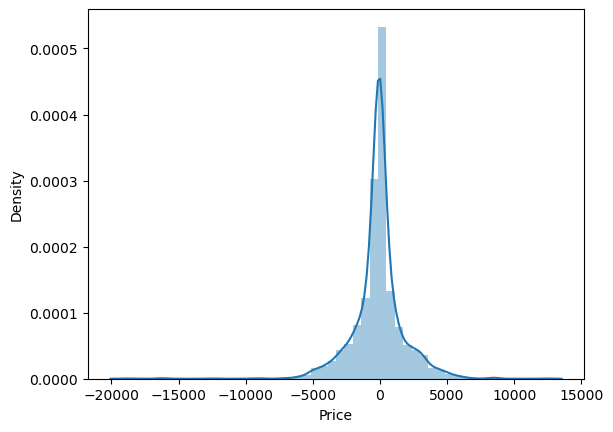

In [473]:
prediction(RandomForestRegressor())

In [476]:
from sklearn.tree import DecisionTreeRegressor

Model score: 0.9685939162204833
prediction of model is: [10413.  7229.  3597. ... 12692.  6094.  8792.]


R2 score of model is: 0.6490825539865597
MAE: 1428.459528266567
MSE: 6720892.335215692
RMSE: 2592.4683865412308
MAPE: 16.039501800634284


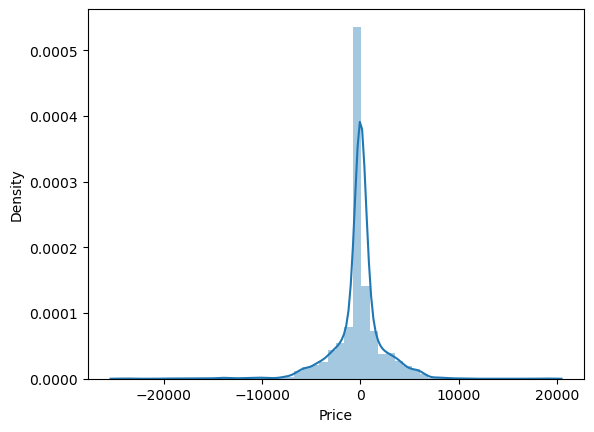

In [478]:
prediction(DecisionTreeRegressor())

In [481]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Model score: 0.5877704775383737
prediction of model is: [ 9171.82501663  8441.74397508  3937.79435858 ... 10944.31738025
  5393.56094566 10275.15142477]


R2 score of model is: 0.5955164353760071
MAE: 1958.5071052950536
MSE: 7746809.171459647
RMSE: 2783.3090326910606
MAPE: 24.27055032193759


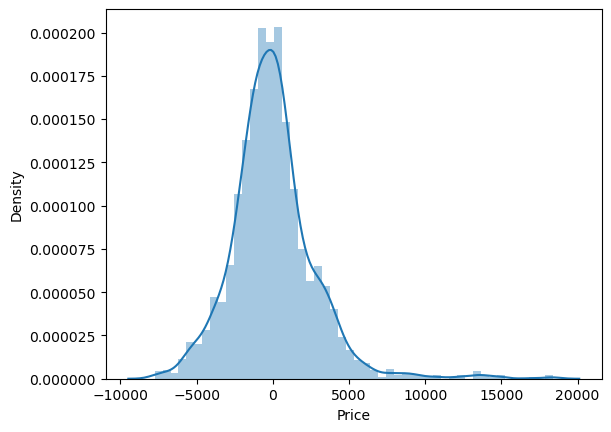

In [483]:
prediction(LinearRegression())

Model score: 0.5877704026868509
prediction of model is: [ 9171.65019163  8441.81725429  3934.85936496 ... 10944.08308281
  5394.97476402 10276.41651297]


R2 score of model is: 0.5955117696954371
MAE: 1958.4523026997629
MSE: 7746898.530188139
RMSE: 2783.3250852511173
MAPE: 24.269256061739053


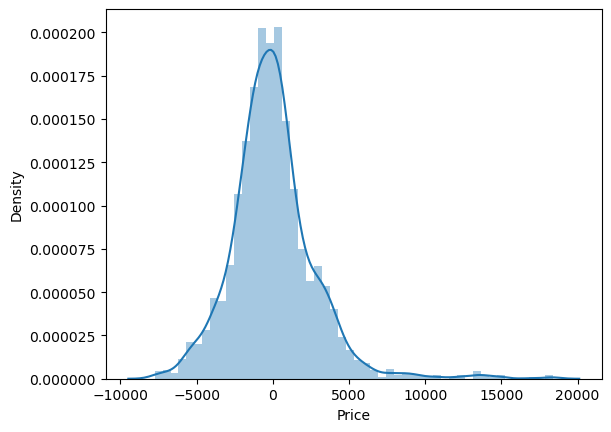

In [486]:
prediction(Ridge(alpha=1.0))

Model score: 0.5877704432723082
prediction of model is: [ 9171.86397517  8440.9771664   3935.0290822  ... 10944.00534858
  5394.21446527 10276.09379991]


R2 score of model is: 0.5955106228513385
MAE: 1958.466307140932
MSE: 7746920.494943097
RMSE: 2783.329031024377
MAPE: 24.269112573935686


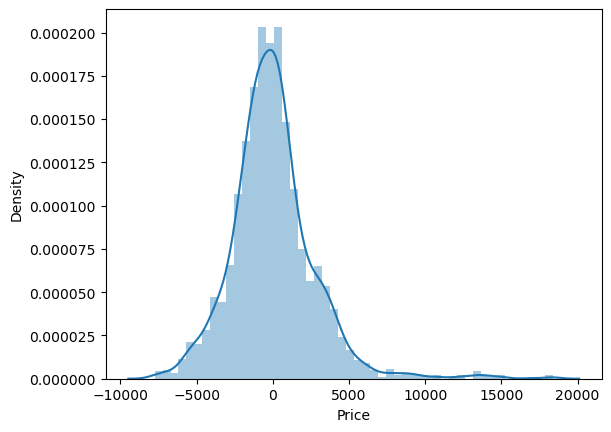

In [489]:
prediction(Lasso(alpha=0.1))

In [492]:
#Tuning Hyper-parameters for Random Forest

In [494]:
from sklearn.model_selection import RandomizedSearchCV

In [496]:
rf_reg = RandomForestRegressor()

In [498]:
n_estimators = [int(x) for x in np.linspace(100, 1200,6)]
max_features = ["sqrt", "log2"]
max_depth = [int(x) for x in np.linspace(5, 30,4)] 
min_samples_split = [5,10,15]

In [500]:
n_estimators

[100, 320, 540, 760, 980, 1200]

In [502]:
'''param_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split
}'''

'param_grid = {\n    "n_estimators": n_estimators,\n    "max_features": max_features,\n    "max_depth": max_depth,\n    "min_samples_split": min_samples_split\n}'

In [504]:
#param_grid

In [506]:
param_grid = {
    'n_estimators': [100, 300, 500, 1000, 1500],  # Increase number of trees
    'max_depth': [None, 10, 20, 30, 50],  # Allow deeper trees
    'max_features': ["sqrt", "log2"],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]  # Try tuning leaf size
}

In [512]:
rf_random = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_grid, cv=5, scoring='r2', random_state=42, n_jobs=-1, verbose=2)

In [514]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 300, 500, 1000,
                                                         1500]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_estimator_

In [ ]:
rf_random.best_score_

In [ ]:
rf_random.best_params_